In [1]:
import pandas as pd

In [2]:
close_px_all = pd.read_csv('data/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [3]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [4]:
close_px = close_px.resample('B').ffill()

In [5]:
%matplotlib notebook

In [6]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


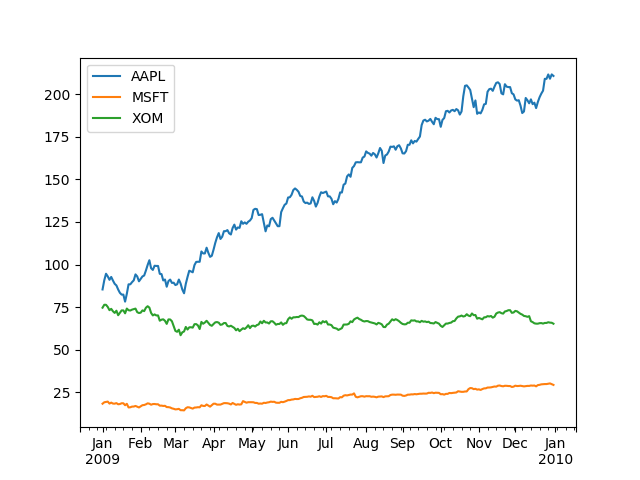

In [7]:
close_px.loc['2009'].plot()

<IPython.core.display.Javascript object>


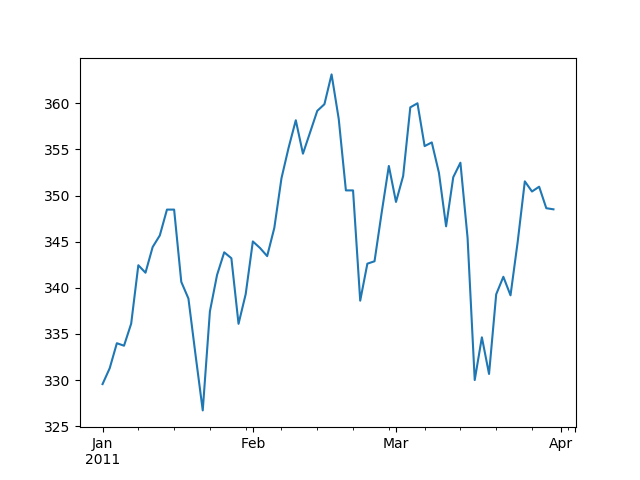

In [8]:
fig = plt.figure()
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

In [9]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()

<IPython.core.display.Javascript object>


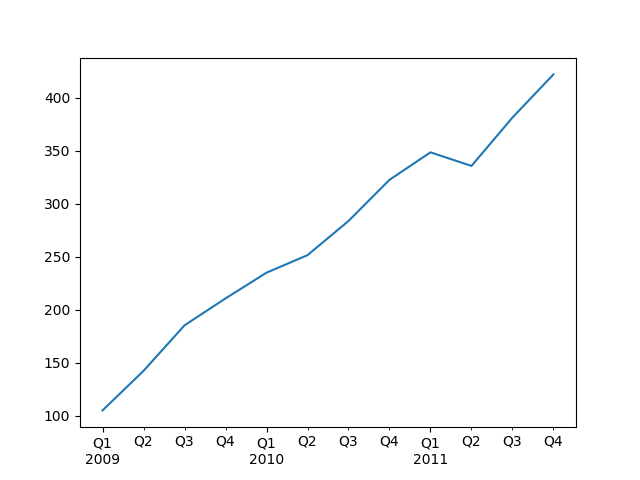

In [10]:
fig = plt.figure()
appl_q.loc['2009':].plot()

<IPython.core.display.Javascript object>


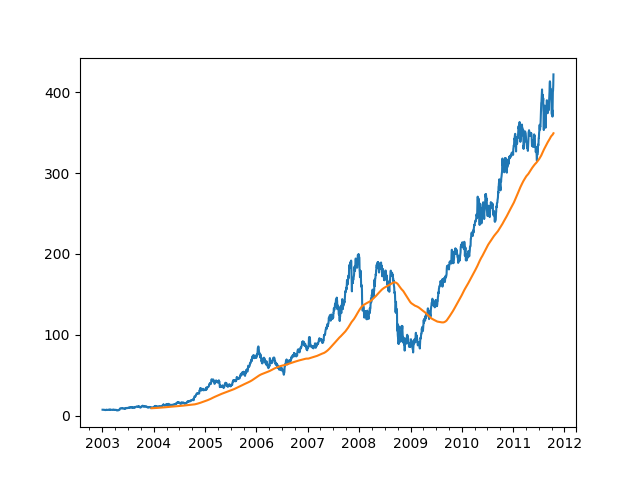

In [11]:
fig = plt.figure()
close_px.AAPL.plot()

In [12]:
close_px.AAPL.rolling(250).mean().plot() # 250 日均线

In [13]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [14]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


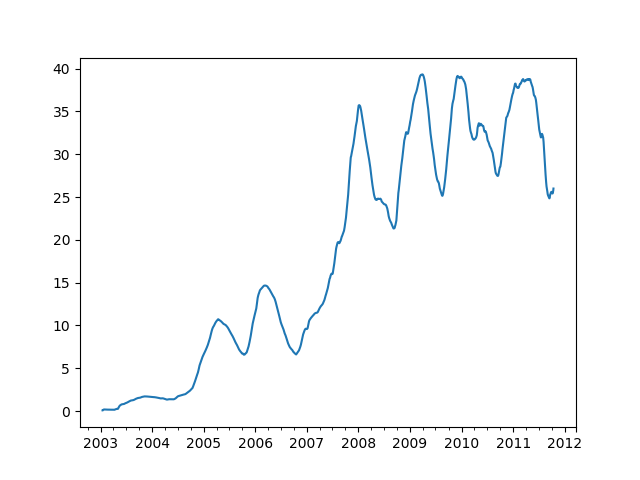

In [15]:
fig = plt.figure()
appl_std250.plot()

In [16]:
expanding_mean = appl_std250.expanding().mean()

<IPython.core.display.Javascript object>


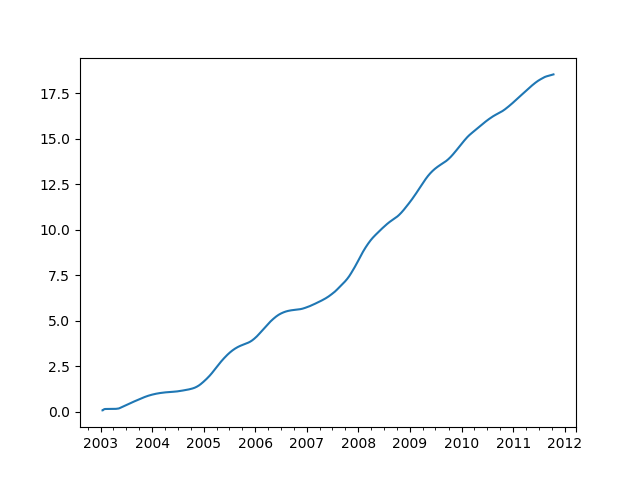

In [17]:
fig = plt.figure()
expanding_mean.plot()

<IPython.core.display.Javascript object>


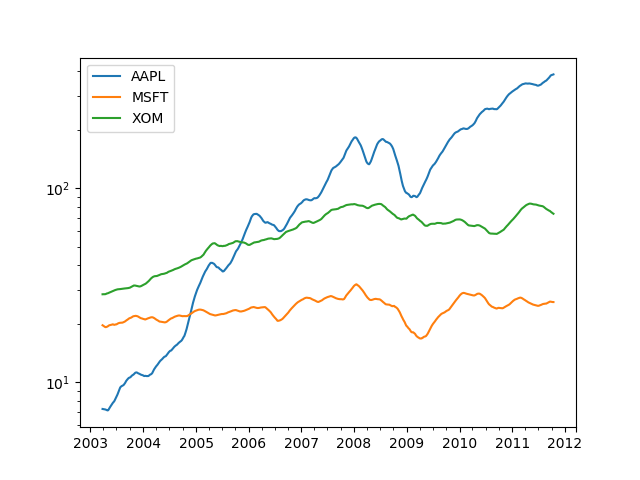

In [18]:
close_px.rolling(60).mean().plot(logy=True)

In [19]:
aapl_px = close_px.AAPL['2005':'2009']

In [20]:
ma60 = aapl_px.rolling(60, min_periods=50).mean()

In [21]:
ewma60 = aapl_px.ewm(span=60).mean()

<IPython.core.display.Javascript object>


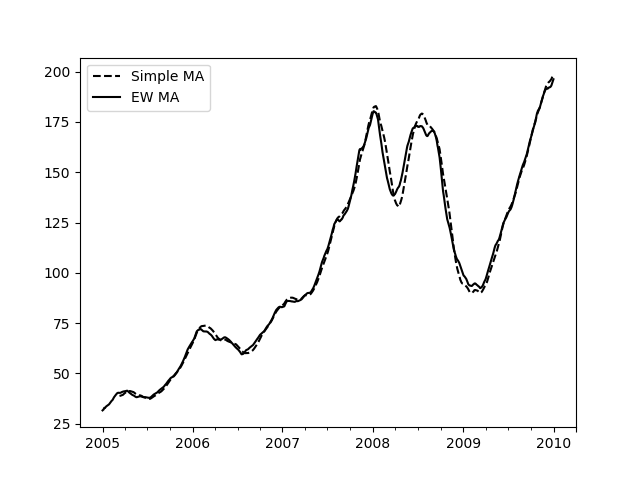

In [22]:
fig = plt.figure()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

In [23]:
spx_px = close_px_all['SPX']

In [24]:
spx_rets = spx_px / spx_px.shift(1) - 1

In [25]:
returns = close_px.pct_change()

In [26]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


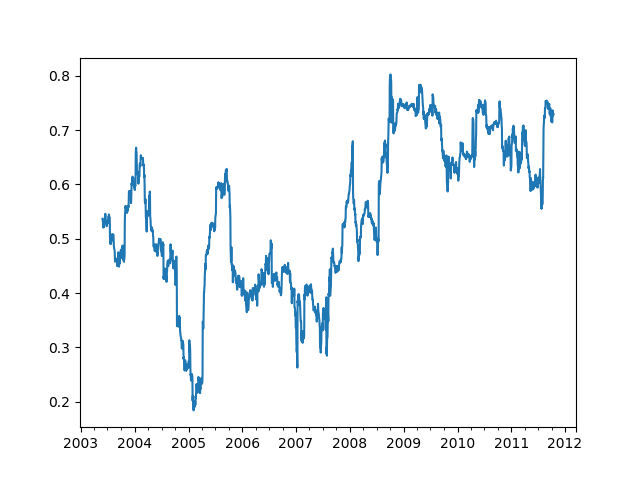

In [27]:
fig = plt.figure()
corr.plot()

In [28]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


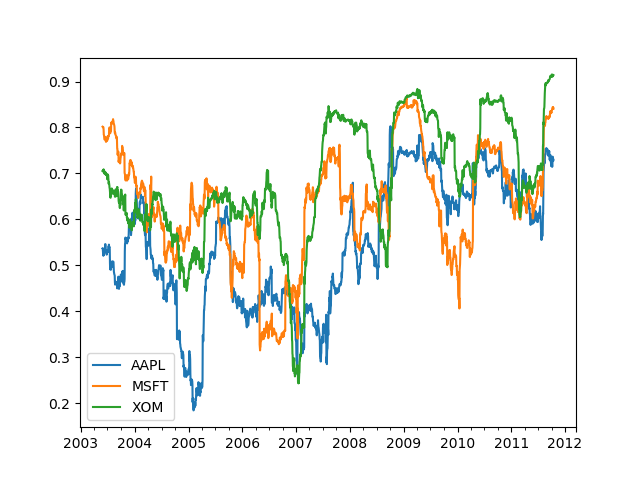

In [29]:
corr.plot()

In [31]:
from scipy.stats import percentileofscore

In [32]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [33]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

d:\code\hello-pandas\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


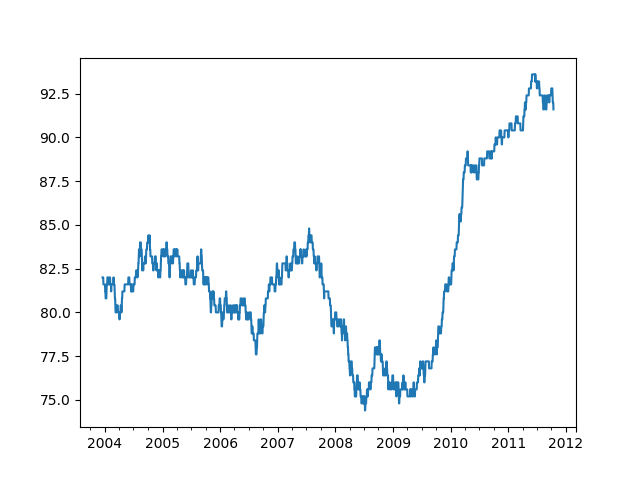

In [34]:
fig = plt.figure()
result.plot()